
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Exercise Session 2 - Computer vision: basic image processing and feature tracking<br/> Autumn 2020 <br/> Duration : 4 hours (2 in session + 2 at home)</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

Note : the images used in this exercise session were taken from tutorials online. And although the references are not provided here so that you don't have a sneak peak at the solution, you will not be excused if you do not cite your sources in the project. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Goals" data-toc-modified-id="Learning-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Goals</a></span></li><li><span><a href="#Activity-1---Exploring-Different-Image-Processing-Filters" data-toc-modified-id="Activity-1---Exploring-Different-Image-Processing-Filters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activity 1 - Exploring Different Image Processing Filters</a></span><ul class="toc-item"><li><span><a href="#Denoising-Filters" data-toc-modified-id="Denoising-Filters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Denoising Filters</a></span><ul class="toc-item"><li><span><a href="#Importing-OpenCV,-Reading-and-Displaying-an-Image" data-toc-modified-id="Importing-OpenCV,-Reading-and-Displaying-an-Image-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Importing OpenCV, Reading and Displaying an Image</a></span></li><li><span><a href="#Testing-the-output-of-the-different-filters-on-the-image-to-understand-how-they-work" data-toc-modified-id="Testing-the-output-of-the-different-filters-on-the-image-to-understand-how-they-work-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Testing the output of the different filters on the image to understand how they work</a></span></li></ul></li><li><span><a href="#Edge-Detection-Filters" data-toc-modified-id="Edge-Detection-Filters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Edge Detection Filters</a></span></li></ul></li><li><span><a href="#Activity-2---Image-Tracking" data-toc-modified-id="Activity-2---Image-Tracking-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Activity 2 - Image Tracking</a></span></li><li><span><a href="#Activity-3---Implementing-the-Hough-Transform-to-Identify-Straight-Lines-in-an-Image" data-toc-modified-id="Activity-3---Implementing-the-Hough-Transform-to-Identify-Straight-Lines-in-an-Image-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Activity 3 - Implementing the Hough Transform to Identify Straight Lines in an Image</a></span><ul class="toc-item"><li><span><a href="#Importing-the-libraries" data-toc-modified-id="Importing-the-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Importing the libraries</a></span></li><li><span><a href="#Loading-and-displaying-the-image" data-toc-modified-id="Loading-and-displaying-the-image-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading and displaying the image</a></span></li><li><span><a href="#Creating-the-hough-transform-matrix" data-toc-modified-id="Creating-the-hough-transform-matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Creating the hough transform matrix</a></span></li><li><span><a href="#Identifying-the-maxima-of-the-Hough-Transform" data-toc-modified-id="Identifying-the-maxima-of-the-Hough-Transform-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Identifying the maxima of the Hough Transform</a></span><ul class="toc-item"><li><span><a href="#Isolating-the-brightest-spots-through-thresholding" data-toc-modified-id="Isolating-the-brightest-spots-through-thresholding-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Isolating the brightest spots through thresholding</a></span></li><li><span><a href="#Enlarging-the-size-of-the-spots-through-morphological-operators" data-toc-modified-id="Enlarging-the-size-of-the-spots-through-morphological-operators-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Enlarging the size of the spots through morphological operators</a></span></li><li><span><a href="#Identifying-the-Centroids'-Locations-Through-Contours" data-toc-modified-id="Identifying-the-Centroids'-Locations-Through-Contours-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Identifying the Centroids' Locations Through Contours</a></span></li></ul></li><li><span><a href="#Computing-the-location-of-the-straight-lines-in-the-original-image-and-drawing-them" data-toc-modified-id="Computing-the-location-of-the-straight-lines-in-the-original-image-and-drawing-them-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Computing the location of the straight lines in the original image and drawing them</a></span></li></ul></li></ul></div>

---

# Learning Goals


- Understanding the main steps of computer vision, from cameraframes to high-level information


- Implementing the tracking of an object. 


- Implementing the hough transform of an image to identify segments


Note that you will need opencv for this exercise session

<br/>


In [1]:
!pip install opencv-python tqdm matplotlib numpy ipywidgets

     |████████████████████████████████| 52.3 MB 21.6 MB/s eta 0:00:01    |███████▋                        | 12.5 MB 5.6 MB/s eta 0:00:08


# Activity 1 - Exploring Different Image Processing Filters

The first step of many image processing pipelines includes image filtering. 


You know that filters are applied through convolution and that this can be done in the Fourier space. However, they can also be applied in the image space by computing a moving weighted average between the kernel corresponding to the given filter and the original image. This is illustrated in the image below (taken from [here](https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37)). 



<br/>

![Pentagon](images/kernel_conv.png)

<br/>


However, rather than go into the detail of the different implementations of convolutions and the kernels associated to the different filters (which do not get me wrong, you do have to know for the exam), the objective here is to take time to learn about the differences between the different filers by using a computer vision library (opencv) to test them on a dataset of images. 


The types of filters we are intersted (for the moment at least) are :

- **Denoising filters (low pass filters)**, which help reduce the amount of noise in an image and smoothen it out. Examples of denoising filters include average filtering, median filtering, gaussian filtering. 

- **Edge detection filters (high pass filters)**. In the course you have seen the sobel, robert and prewitt filters as well as the Canny Edge filter. 


If you are interested in having more details about these filtering approaches you can have a look at the introduciton to image filtering provided [here](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html).


## Denoising Filters

The goal here is to undestand the different denoising filters that opencv has to offer and when to use them: 

- **average filtering** with the cv2.blur function


- **median filtering** with the cv2.medianBlur function


- **gaussian filtering** with the cv2.GaussianBlur function


- **bilateral filtering** with the cv2.bilateralFilter function


You can call the help function for each of these functions to access the documentation. In the cell below is an example of how to use the help function. 


In [12]:
import cv2
help(cv2.bilateralFilter)

Help on built-in function bilateralFilter:

bilateralFilter(...)
    bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
    .   @brief Applies the bilateral filter to an image.
    .   
    .   The function applies bilateral filtering to the input image, as described in
    .   http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
    .   bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is
    .   very slow compared to most filters.
    .   
    .   _Sigma values_: For simplicity, you can set the 2 sigma values to be the same. If they are small (\<
    .   10), the filter will not have much effect, whereas if they are large (\> 150), they will have a very
    .   strong effect, making the image look "cartoonish".
    .   
    .   _Filter size_: Large filters (d \> 5) are very slow, so it is recommended to use d=5 for real-time
    .   applications, and perhaps d=9 for offline applicatio

### Importing OpenCV, Reading and Displaying an Image

Now let's start by importing opencv for the image processing and matplotlib for the plotting

In [5]:
import cv2
import matplotlib.pyplot as plt

Now let's load one of the images and display it. 

Note that opencv loads images in BGR mode whilst matplotlib (and most systems in general) work in RGB. That is why when we display the image we need to inverse the order of the last dimension

Here we have loaded an image that contains Gaussian noise. 

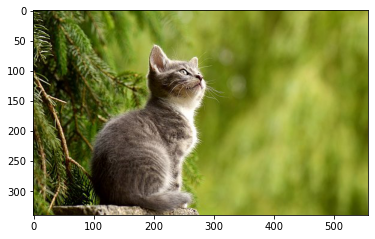

In [6]:
filename = 'images/download.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

plt.imshow(img[:,:,::-1])

### Testing the output of the different filters on the image to understand how they work

Apply the filters on the original image and display the output. Play with the parameters to see how they influence the output to get a sense of how they work.

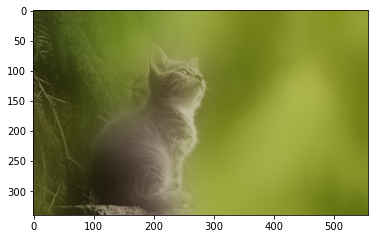

In [23]:
median_img = cv2.bilateralFilter(img,500,255,30)
plt.imshow(median_img[:,:,::-1])

***What is the particularity of the bilateral filter?***



Now apply the filters on the `gaussian_noise` image. 

![Pentagon](images/gaussian_noise.png)

***Based on your observations, which filter is most adapted if you want to remove gaussian type noise?***



***Which filter would you use if you wanted to remove salt and pepper type noise like the one in the image below?***
    
<br/>

![Pentagon](images/salt_pepper_noise.png)

<br/>


## Edge Detection Filters

Let's focus on three filters:

- Sobel (`cv2.Sobel` function): this filter relies on detecting edges in one direction than in the perpendicular to isolate all edges in the image. As it is very close in the underlying principle to the Robers and Prewitt filters we just focus on this one. 

- Laplacian (`cv2.Laplacian` function): this is a new filter which you did not see in the course. Intead of looking for the maximum of the derivative of an image as the Sobel filter does, this filter looks for the zero crossing of the second derivative. 

- Canny (`cv2.Canny` function): a bit more elaborate than the previous two, the gradient of the image is computed but there is an extra processing that looks to validate whether a pixel is actually part of an edge or not. If you are interested in the details you can have a look [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).



Apply the different edge detection filters on the ``SanFrancisco`` image and try to get the best results you can by tuning the parameters of the different algorithms.

<br>

![](images/SanFrancisco.jpg)

<br>

***Generally, what should you do before applying the edge detection to improve the results of the filtering?***


In particular, for the Sobel filter try to answer the following questions: 

***When the derivative is along the horizontal axis, what is the effect on the vertical axis?***


***How do you implement a Sobel filter that works in both directions?***

   

Loading the image in grayscale to be able to apply the edge detection filters

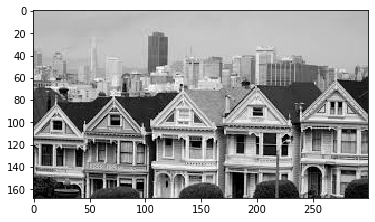

In [5]:
img = cv2.imread('images/SanFrancisco.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap = 'gray')

Now you can work on the rest :) 

# Activity 2 - Image Tracking

You can track the position of an object in an image by using what is called template matching. Let's apply template matching on a video of the Thymio robot following a line and attempt to track the position of the robot throughout the video using the different techniques that opencv provides. 

First we are going to load the video and store the different frames. 




In [24]:
cap = cv2.VideoCapture('images/thymio_line_following.mp4')

# Check if camera opened successfully
if not cap.isOpened(): 
    print("Error opening video stream or file")

video_imgs = []

while True:
    ret, frame = cap.read()
    if ret == True:
        video_imgs.append(frame)
    # Break the loop
    else:
        break
        
print("There are {} frames in the video".format(len(video_imgs)))

There are 965 frames in the video


Let's take one of the frames and crop the Thymio to make our template. In frame 420, the Thymio is located between x = \[446, 611\] and y = \[312, 484\] (determined using the cursor on the image). Why are we doing it this way? Template matching does not work well if you take a reference / template image that is not to scale w.r.t the image you are going to be looking in. One solution is to use multi-scale [template matching](https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/). We are not going to go into that here but the link provided gives an example of how that could be implemented.  

Let's display the portion of frame 420 where the Thymio is.

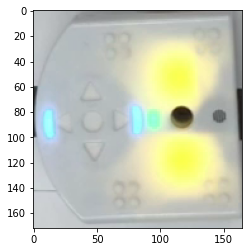

In [25]:
template = video_imgs[420][312:484,446:611,:]
plt.figure()
plt.imshow(template)
plt.show()

In [28]:
template.shape

(172, 165, 3)

Now have a look at the opencv tutorial [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) and apply the different template matching techniques on the image and the template. 

***Which methods seems the most robust and why?***


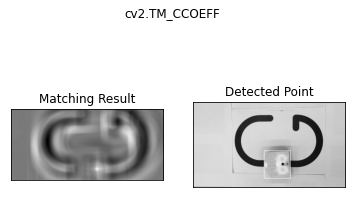

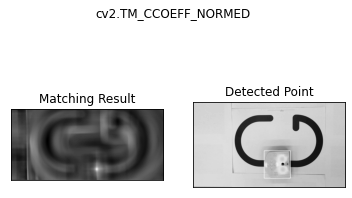

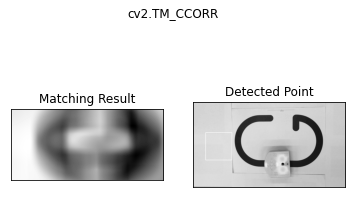

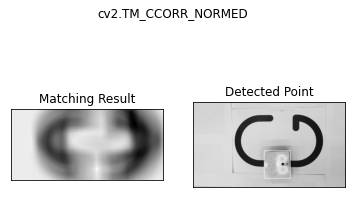

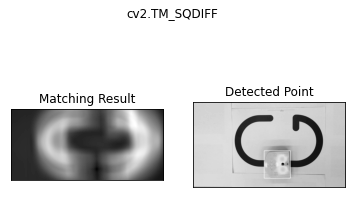

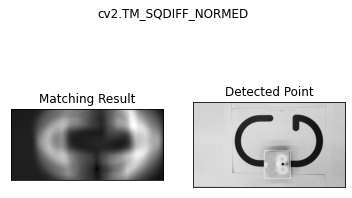

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.cvtColor(video_imgs[420], cv2.COLOR_BGR2GRAY)
template = img[312:484,446:611]
img2 = img.copy()
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

Once you have selected the algorithm that you believe to be the most appropriate, apply it to the set of images that were extracted from the video. To visualise the result of the process, we have provided a browse images function which when provided the individual images lets you nagivate through them with a slider. 

***What are the limitations of template matching?***
 

In [31]:
from ipywidgets import interact

%matplotlib inline

def browse_images(images, titles = None):
    if titles == None:
        titles = [i for i in range(len(images))]
        
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(titles[i], y=-0.5)
        plt.show()
    interact(view_image, i=(0,n-1))


In [47]:
def track_robot(img, template):
    img_gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = img_gray.copy()
    w, h = template.shape[::-1]

    method = 'cv2.TM_CCOEFF_NORMED'


    img3 = img2.copy()
    method = eval(method)

    # Apply template Matching
    res = cv2.matchTemplate(img3,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img_gray,top_left, bottom_right, 255, 2)

    return img_gray

In [41]:
range(len(video_imgs))

range(0, 965)

In [50]:
tracked_robot = []
template =  cv2.cvtColor(video_imgs[420][312:484,446:611], cv2.COLOR_BGR2GRAY)
for i in range(len(video_imgs)):
    img = video_imgs[i]
    img_tracked = track_robot(img, template)
    tracked_robot.append(img_tracked)

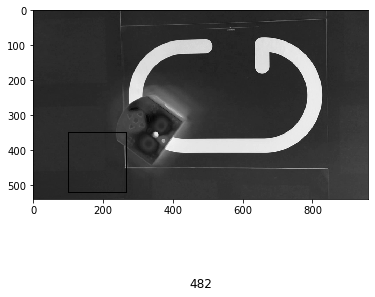

In [51]:
browse_images(tracked_robot)

# Activity 3 - Implementing the Hough Transform to Identify Straight Lines in an Image

The goal of this exercise is going to be to code the Hough transform to identify straight lines in an image. We are going to use the following image throughout the exercise in order to test the different steps. The image is located in the Images folder under ``pentagon.png``

As this is one of your first "big" coding exercises we are going to guide you through it. 

<br/>

![Pentagon](Images/pentagon.png)

<br/>

## Importing the libraries 

We are going to need the :

- `opencv` for image processing

- `math` for the trigonometry functions

- `numpy` for array processing

- `matplotlib` for plotting

> Note that the exercise was inspired from the example [here](https://www.science-emergence.com/Articles/Implementing-a-simple-python-code-to-detect-straight-lines-using-Hough-transform/)

In [9]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt 

## Loading and displaying the image

Start by giving the filename with the full path so that the mpimg module can load the image with the imread function. 

Then display the image object with plt.imshow()

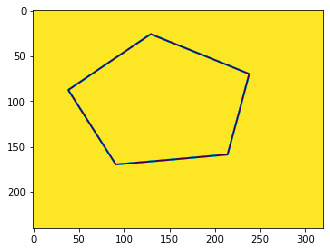

In [10]:
filename = 'images/pentagon.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)

## Creating the hough transform matrix

1. We start by creating a numpy array of arbitrary dimensions. 

In [11]:
# We choose to have a final matrix of the following
# dimensions. This is an arbitrary decision

r_dim = 200 
theta_dim = 300

# Now, create the hough transform matrix (filled with zeros), called hough_space

2. Now we need to relate the dimensions of this new matrix to the corresponding values along the rho and theta axes. This means we need to determine the minimum and maximum values of theta and rho. 

In [12]:
# Find the values of theta min and theta max


# From the image shape, determine rho min and rho max



Now we are going to compute the hough transform of the original image. The pseudo code is the following :

    for all pixeles:
        if the pixel is white:
              do nothing
        else:
            for theta values :
                compute rho from the pixel coordinates and theta
                convert rho to the image space
                update the hough space matrix for the theta and rho coordinates in the array
                
You should get a result similar to this one 


<br/>

![Pentagon](Images/houghTransform.png)

<br/>



## Identifying the maxima of the Hough Transform

After calculating the Hough space, the next step is to find the local extrema. This will give us the rho and theta parameters of the different straight lines in the image. 

To find the extrema, we will do the following :

1. isolate the brightest spots

2. enlarge the size of the spots

3. find the centroid of the spots

### Isolating the brightest spots through thresholding

To isolate the bright spots and remove the gradients around the maxima we are going to apply **thresholding** to convert the image into 0's for the dark areas and 1's around the maximas. Have a look [here](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) at the different thresholding functions that opencv has to offer. 

Play with the parameters to try to obtain an image similar to this one 

<br/>

![Pentagon](images/thresholding_output.png)

<br/>

### Enlarging the size of the spots through morphological operators

To identify the location of the local maxima, we will make use of find contours. However the spots in the image are too small to apply the opencv functions. That is why we are going to start by increasing their size through morphological operations. Have a look [here](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html) to see the different operators and their effect on a binary image. 


You should get an image like this one : 

<br/>

![Pentagon](images/morphological_output.png)

<br/>

### Identifying the Centroids' Locations Through Contours 

Now we have bigger spots and we are going to use Opencv's built in functions to find the contours and deduce the location of the centroid in the hough space. [An example is provided here](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/). 

You should get a result similar to this one : 


<br/>

![Pentagon](Images/centroid_output.png)

<br/>

## Computing the location of the straight lines in the original image and drawing them

With the maxima obtained, we can now compute the corresponding segments in the original image. You should get a result similar to this one. 


<br/>

![Pentagon](images/hough_transform.png)

<br/>
